<h1>CORRECT MEASUREMENTS AND CALCULATIONS STARTING FROM HERE</h1>

<h2>First experiment, without ALL OFF, default config</h2>

In [1]:
import werpy 
import librosa
import numpy as np
import matplotlib.pyplot as plt    
import plotly.graph_objects as go


In [2]:
import speech_recognition as sr
import editdistance
r = sr.Recognizer()

In [3]:
sound = sr.AudioFile('seventh_measure/noutput3.wav')

with sound as source:
    audio = r.record(source)
eesti_text = r.recognize_google(audio, language="et-EE")

print("Recognized text:", eesti_text)

Recognized text: paljud annavad all päris alguses teised lähevad veidi kaugemale kuid ainult mõned leiavad piisavalt jõudu ja motivatsiooni et plaanitu lõpuni viia


In [4]:
signal_array1 = []
signal_array2 = []
signal_array3 = []

for i in range(1, 15):
    filename = f"seventh_measure/noutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array1.append(signal)

for i in range(15, 29):
    filename = f"seventh_measure/noutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array2.append(signal)

for i in range(29, 43):
    filename = f"seventh_measure/noutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array3.append(signal)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
noise_delta_3, sr1 = librosa.load("noise_delta_3.wav")

In [6]:
def snr(x, y):
    noise_free_power = np.mean(np.square(y))
    signal_power = np.mean(np.square(x))

    snr_value = 10 * np.log10((signal_power - noise_free_power)/ noise_free_power)
    return snr_value


snr_list1 = []
for sig in signal_array1:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list1.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

snr_list2 = []
for sig in signal_array2:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list2.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

snr_list3 = []
for sig in signal_array3:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list3.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

SNR value for the recording (dB): 26.066129207611084
SNR value for the recording (dB): 23.343472480773926
SNR value for the recording (dB): 24.40706968307495
SNR value for the recording (dB): 24.20841693878174
SNR value for the recording (dB): 24.990012645721436
SNR value for the recording (dB): 24.204304218292236
SNR value for the recording (dB): 24.64834690093994
SNR value for the recording (dB): 24.30255889892578
SNR value for the recording (dB): 24.752509593963623
SNR value for the recording (dB): 22.948598861694336
SNR value for the recording (dB): 24.671456813812256
SNR value for the recording (dB): 24.47789430618286
SNR value for the recording (dB): 24.423270225524902
SNR value for the recording (dB): 25.001978874206543
SNR value for the recording (dB): 28.341691493988037
SNR value for the recording (dB): 22.837553024291992
SNR value for the recording (dB): 24.54854965209961
SNR value for the recording (dB): 21.36662244796753
SNR value for the recording (dB): 24.721662998199463


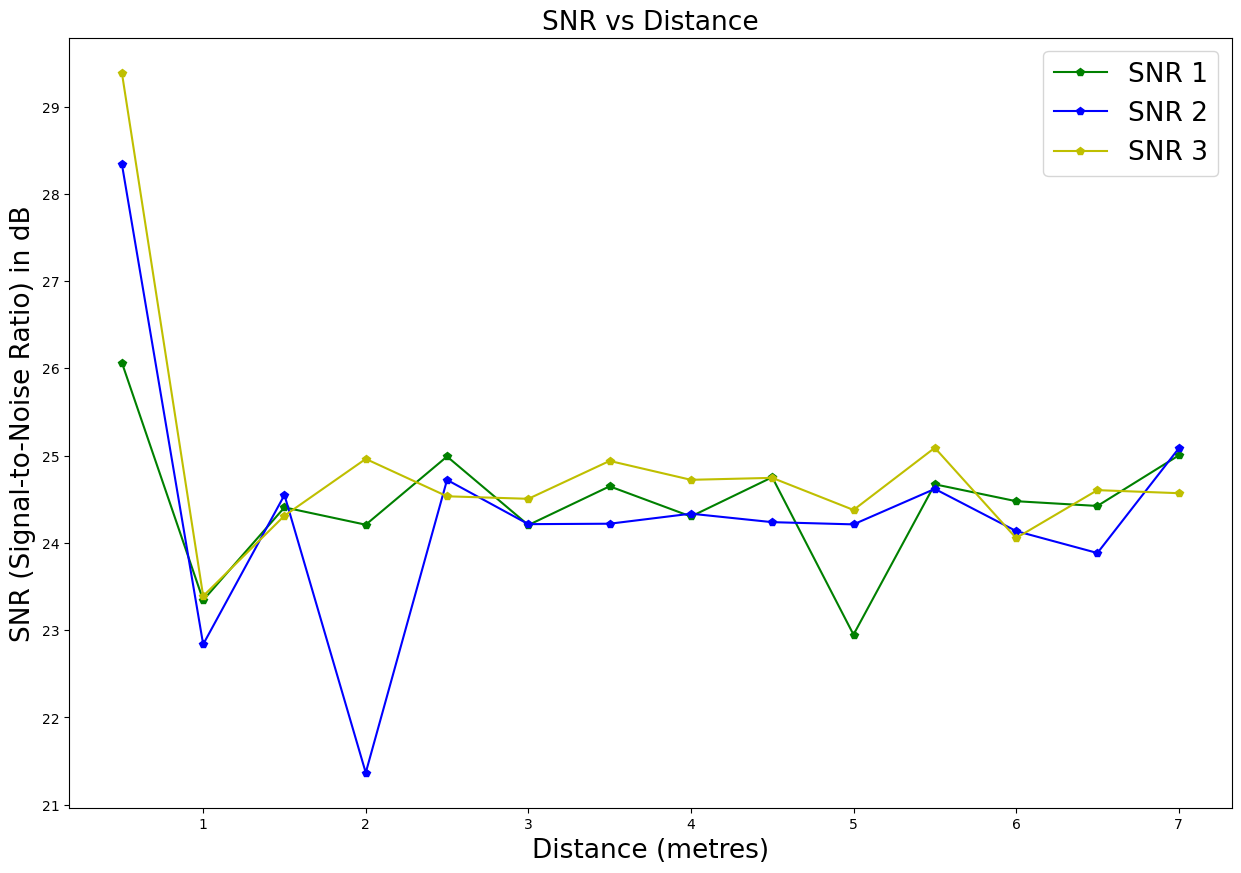

In [7]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]

plt.figure(figsize=(15, 10))
plt.plot(distance_points, snr_list1, marker='p', linestyle='-', color='g', label='SNR 1')
plt.plot(distance_points, snr_list2, marker='p', linestyle='-', color='b', label='SNR 2')
plt.plot(distance_points, snr_list3, marker='p', linestyle='-', color='y', label='SNR 3')

plt.xlabel('Distance (metres)',fontsize=19)
plt.ylabel('SNR (Signal-to-Noise Ratio) in dB',fontsize=19)
plt.title('SNR vs Distance',fontsize=19)
plt.legend(fontsize=19) 
plt.show()

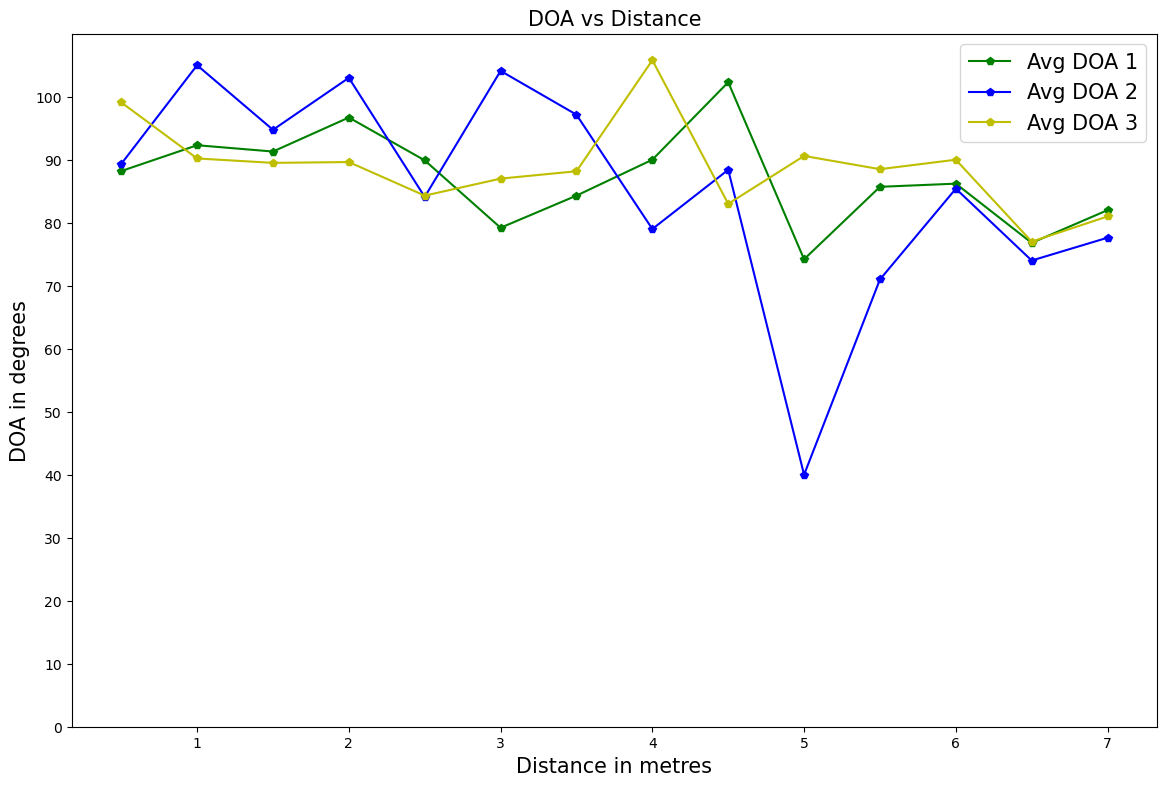

In [8]:
avg_doa = [88.2, 92.3, 91.3, 96.7, 89.9, 79.2, 84.3, 90, 102.3,74.2, 85.7, 86.2, 76.8, 82]
avg_doa2 = [89.33,105,94.75,103,84.1,104.1,97.15,79,88.4,40,71,85.4,74,77.62]
avg_doa3 = [99.1,90.2,89.5,89.63,84.3,87,88.17,105.8,83,90.6,88.5,90,77,81]

plt.figure(figsize=(14, 9))
plt.plot(distance_points, avg_doa, marker='p', linestyle='-', color='g', label='Avg DOA 1')
plt.plot(distance_points, avg_doa2, marker='p', linestyle='-', color='b', label='Avg DOA 2')
plt.plot(distance_points, avg_doa3, marker='p', linestyle='-', color='y', label='Avg DOA 3')

plt.xlabel('Distance in metres',fontsize=15)
plt.ylabel('DOA in degrees',fontsize=15)
plt.title('DOA vs Distance',fontsize=15)
plt.ylim(0,110)
plt.yticks(np.arange(0, 110, 10)) 
plt.legend(fontsize=15)  

plt.show()

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa,
    mode='markers',
    marker=dict(color='green'),
    name='Avg DOA 1',
    
    
))

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa2,
    mode='markers',
    marker=dict(color='blue'),
    name='Avg DOA 2',

))

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa3,
    mode='markers',
    marker=dict(color='yellow'),
    name='Avg DOA 3',

))

fig.update_layout(
    showlegend=True,
    title='DOA vs distance (in metres) in relation to 90 degrees',

)
fig.show()

In [10]:
import speech_recognition as sr
import editdistance
r = sr.Recognizer()

In [11]:
#Then try to calculate the speech error and do it for a straight angle as well

def error_rate(correct_text, recognized_text):
    return editdistance.eval(correct_text, recognized_text) / len(correct_text)

error_rates = []
error_rates2 = []
error_rates3 = []

correct = "paljud annavad alla päris alguses teised lähevad veidi kaugemale kuid ainult mõned leiavad piisavalt jõudu ja motivatsiooni et plaanitu lõpuni viia"

for i in range(1,15):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(15,29):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(29,43):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)


Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.013605442176870748
Error rate:  0.027210884353741496
Error rate:  0.05442176870748299
Error rate:  0.05442176870748299
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.02040816326530612
Error rate:  0.02040816326530612
Error rate:  0.013605442176870748
Error rate:  0.05442176870748299
Error rate:  0.034013605442176874
Error rate:  0.0068

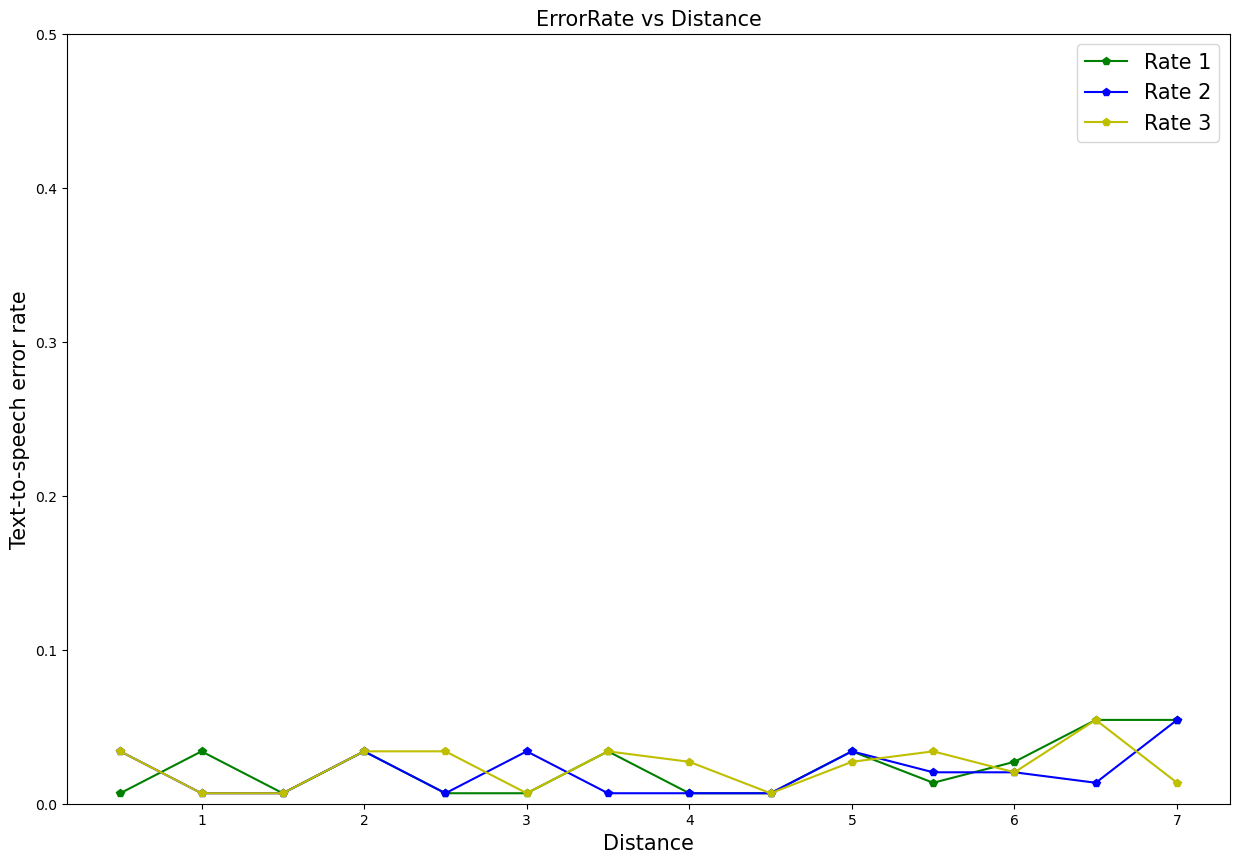

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 1')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 2')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 3')


plt.xlabel('Distance',fontsize=15)
plt.ylabel('Text-to-speech error rate',fontsize=15)
plt.title('ErrorRate vs Distance',fontsize=15)
plt.ylim(0,0.5)
plt.legend(fontsize=15)
plt.show()

In [13]:
error_rates = []
error_rates2 = []
error_rates3 = []

correct = "paljud annavad alla päris alguses teised lähevad veidi kaugemale kuid ainult mõned leiavad piisavalt jõudu ja motivatsiooni et plaanitu lõpuni viia"

for i in range(1,15):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)

for i in range(15,29):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)

for i in range(29,43):
    audio_path = f'seventh_measure/noutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)


Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.09523809523809523
Word error rate:  0.14285714285714285
Word error rate:  0.14285714285714285
Word error rate:  0.09523809523809523
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.142857142

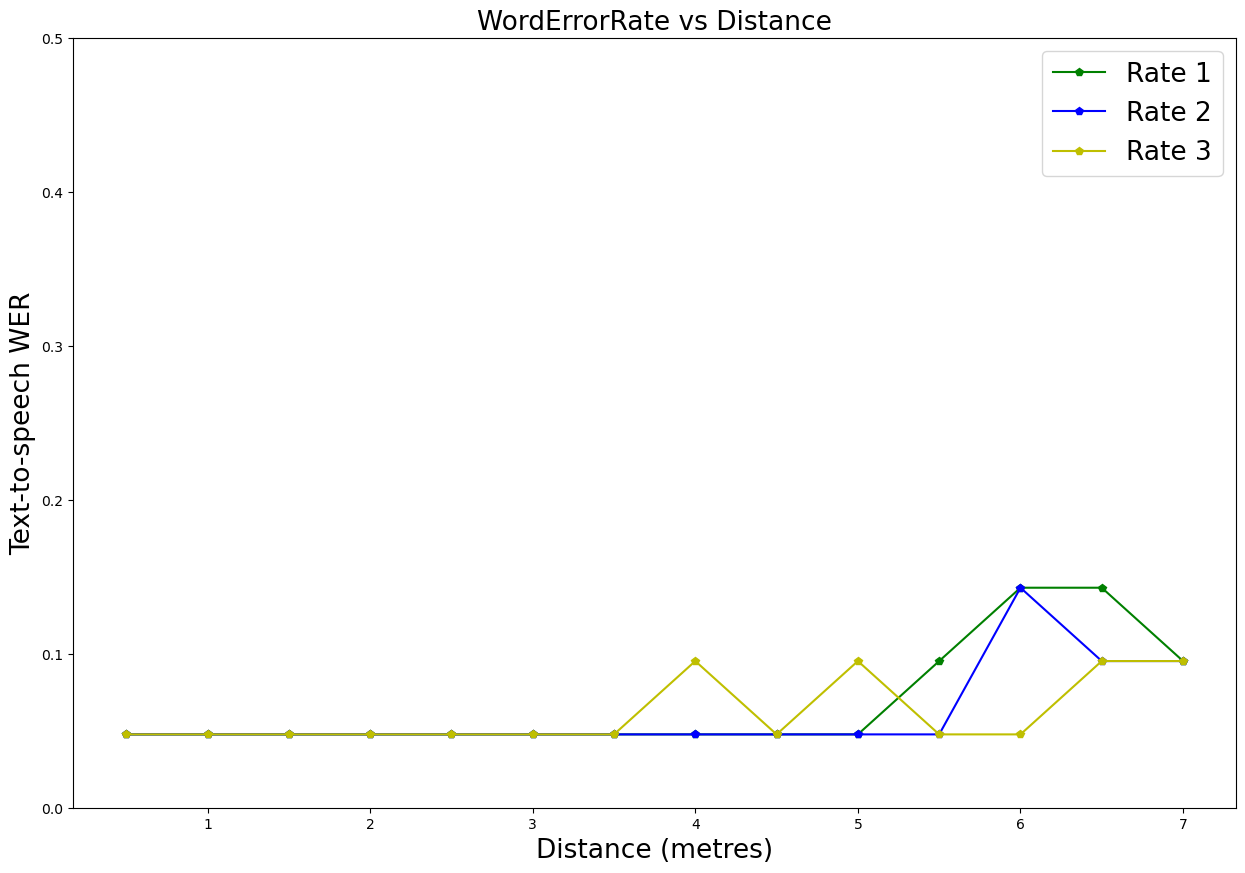

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 1')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 2')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 3')


plt.xlabel('Distance (metres)',fontsize=19)
plt.ylabel('Text-to-speech WER',fontsize=19)
plt.title('WordErrorRate vs Distance',fontsize=19)
plt.ylim(0,0.5)
plt.legend(fontsize=19)
plt.show()

<h2>Second experiment, ALL OFF</h2>

In [15]:
signal_array1 = []
signal_array2 = []
signal_array3 = []

for i in range(1, 15):
    filename = f"seventh_measure/aoutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array1.append(signal)

for i in range(15, 29):
    filename = f"seventh_measure/aoutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array2.append(signal)

for i in range(29, 43):
    filename = f"seventh_measure/aoutput{i}.wav"
    signal, sr = librosa.load(filename)
    signal_array3.append(signal)

In [16]:
snr_list1 = []
for sig in signal_array1:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list1.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

snr_list2 = []
for sig in signal_array2:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list2.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

snr_list3 = []
for sig in signal_array3:
    noise_free_power = np.mean(np.square(noise_delta_3))
    
    snr_value = snr(sig, noise_delta_3)
    snr_list3.append(snr_value)
    print(f"SNR value for the recording (dB):", snr_value)

SNR value for the recording (dB): 40.3205680847168
SNR value for the recording (dB): 36.41282320022583
SNR value for the recording (dB): 34.53103065490723
SNR value for the recording (dB): 33.037354946136475
SNR value for the recording (dB): 32.50998497009277
SNR value for the recording (dB): 31.537699699401855
SNR value for the recording (dB): 30.833287239074707
SNR value for the recording (dB): 30.574510097503662
SNR value for the recording (dB): 30.98609685897827
SNR value for the recording (dB): 30.79880714416504
SNR value for the recording (dB): 30.7275390625
SNR value for the recording (dB): 30.341992378234863
SNR value for the recording (dB): 30.374889373779297
SNR value for the recording (dB): 30.614399909973145
SNR value for the recording (dB): 40.0905704498291
SNR value for the recording (dB): 36.3472843170166
SNR value for the recording (dB): 34.61587905883789
SNR value for the recording (dB): 33.04060220718384
SNR value for the recording (dB): 32.41655349731445
SNR value fo

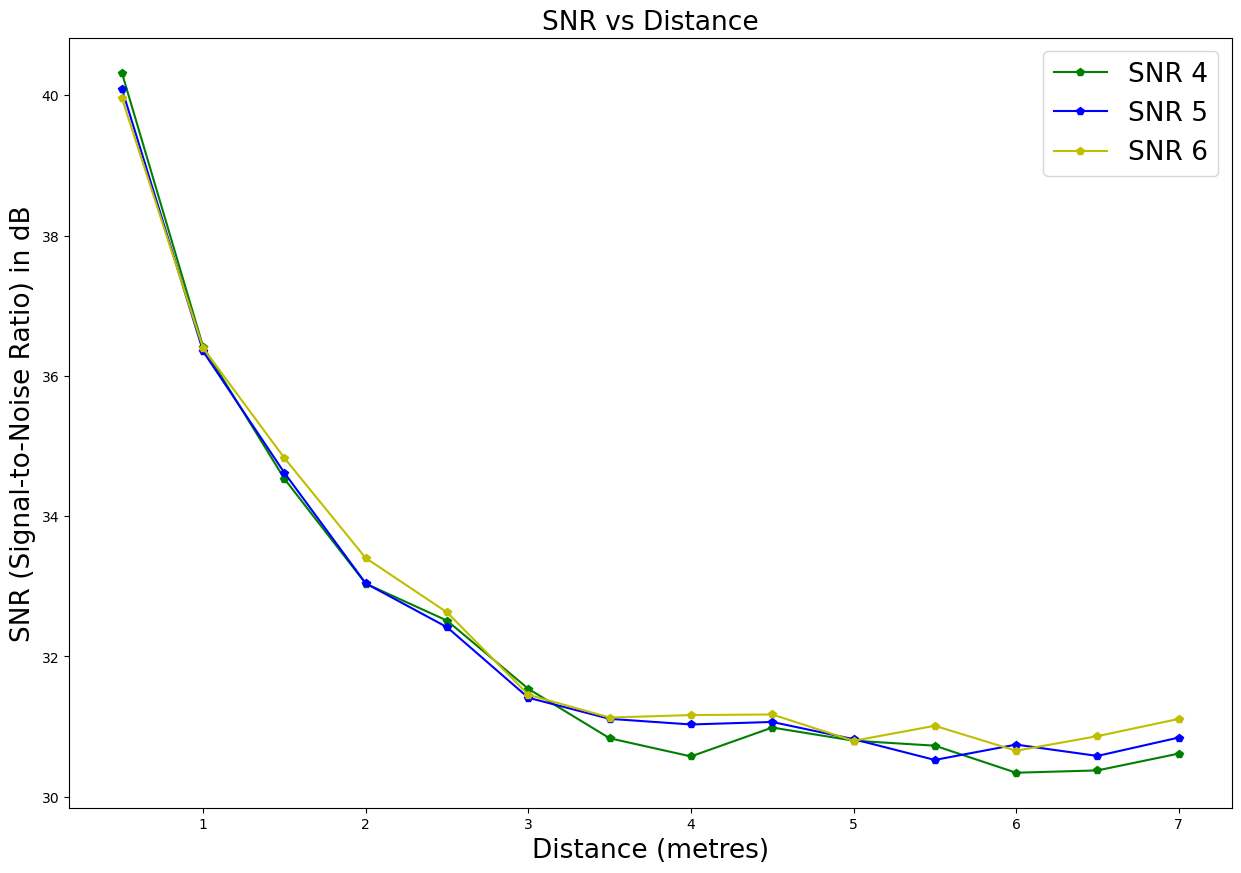

In [17]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]

plt.figure(figsize=(15, 10))
plt.plot(distance_points, snr_list1, marker='p', linestyle='-', color='g', label='SNR 4')
plt.plot(distance_points, snr_list2, marker='p', linestyle='-', color='b', label='SNR 5')
plt.plot(distance_points, snr_list3, marker='p', linestyle='-', color='y', label='SNR 6')

plt.xlabel('Distance (metres)',fontsize=19 )
plt.ylabel('SNR (Signal-to-Noise Ratio) in dB',fontsize=19)
plt.title('SNR vs Distance',fontsize=19)
plt.legend(fontsize=19) 
plt.show()

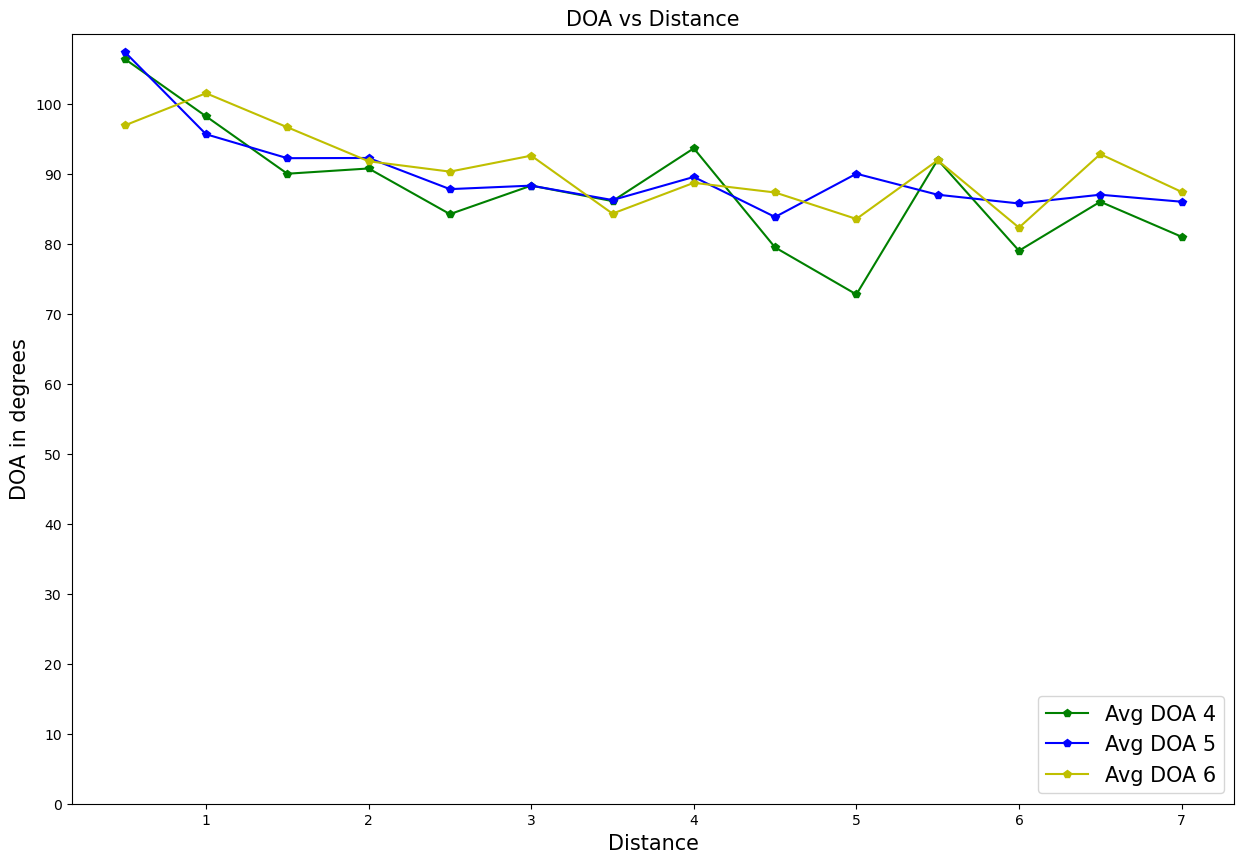

In [18]:
avg_doa = [106.4,98.2,90,90.75,84.23,88.3,86.09,93.63,79.47,72.76,92,79,86,81]
avg_doa2 = [107.4,95.64,92.22,92.25,87.8,88.3,86.24,89.54,83.82,90,87,85.75,87,86]
avg_doa3 = [96.9,101.5,96.64,91.78,90.3,92.58,84.3,88.7,87.32,83.54,91.92,82.3,92.8,87.41]

plt.figure(figsize=(15, 10))
plt.plot(distance_points, avg_doa, marker='p', linestyle='-', color='g', label='Avg DOA 4')
plt.plot(distance_points, avg_doa2, marker='p', linestyle='-', color='b', label='Avg DOA 5')
plt.plot(distance_points, avg_doa3, marker='p', linestyle='-', color='y', label='Avg DOA 6')

plt.xlabel('Distance',fontsize=15)
plt.ylabel('DOA in degrees',fontsize=15)
plt.title('DOA vs Distance',fontsize=15)
plt.ylim(0,110)
plt.yticks(np.arange(0, 110, 10)) 
plt.legend(fontsize=15,loc ="lower right")  

plt.show()

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa,
    mode='markers',
    marker=dict(color='green'),
    name='Avg DOA 4'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa2,
    mode='markers',
    marker=dict(color='blue'),
    name='Avg DOA 5'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
    theta=avg_doa3,
    mode='markers',
    marker=dict(color='yellow'),
    name='Avg DOA 6'
))

fig.update_layout(
    showlegend=True,
    title='DOA vs distance (in metres) in relation to 90 degrees'
)
fig.show()

In [20]:
import speech_recognition as sr
import editdistance
r = sr.Recognizer()

In [21]:
r = sr.Recognizer()
#Then try to calculate the speech error and do it for a straight angle as well

def error_rate(correct_text, recognized_text):
    return editdistance.eval(correct_text, recognized_text) / len(correct_text)

error_rates = []
error_rates2 = []
error_rates3 = []

correct = "paljud annavad alla päris alguses teised lähevad veidi kaugemale kuid ainult mõned leiavad piisavalt jõudu ja motivatsiooni et plaanitu lõpuni viia"

for i in range(1,15):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(15,29):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(29,43):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)


Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.027210884353741496
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.034013605442176874
Error rate:  0.04081632653061224
Error rate:  0.006802721088435374
Error rate:  0.006802721088435374
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.013605442176870748
Error rate:  0.034013605442176874
Error rate:  0.006802721088435374
Error rate:  0.

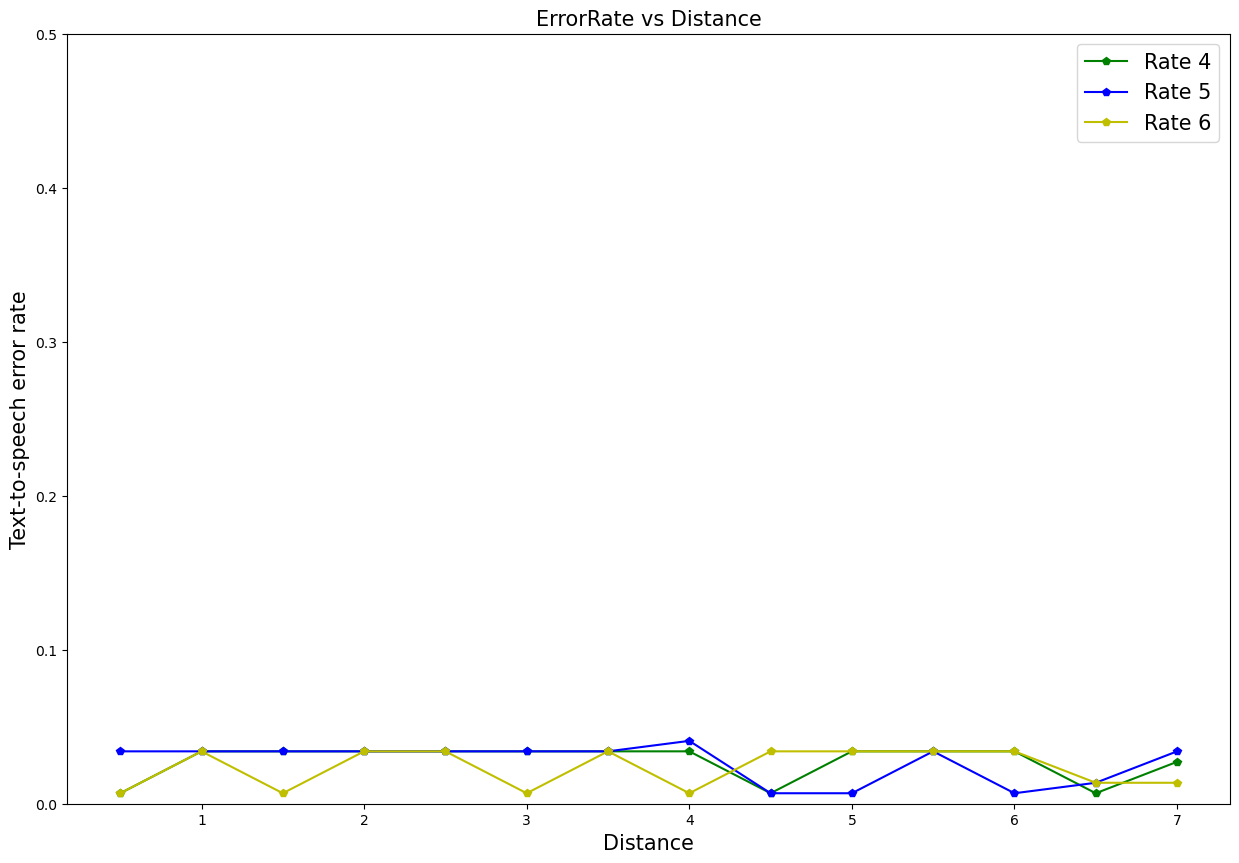

In [22]:
plt.figure(figsize=(15, 10))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 4')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 5')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 6')


plt.xlabel('Distance',fontsize=15)
plt.ylabel('Text-to-speech error rate',fontsize=15)
plt.title('ErrorRate vs Distance',fontsize=15)
plt.ylim(0,0.5)
plt.legend(fontsize=15)
plt.show()

In [23]:
error_rates = []
error_rates2 = []
error_rates3 = []

correct = "paljud annavad alla päris alguses teised lähevad veidi kaugemale kuid ainult mõned leiavad piisavalt jõudu ja motivatsiooni et plaanitu lõpuni viia"

for i in range(1,15):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)

for i in range(15,29):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)

for i in range(29,43):
    audio_path = f'seventh_measure/aoutput{i}.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = werpy.wer(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Word error rate: ", error_rate_calculated)


Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.09523809523809523
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.09523809523809523
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.047619047619047616
Word error rate:  0.0476190

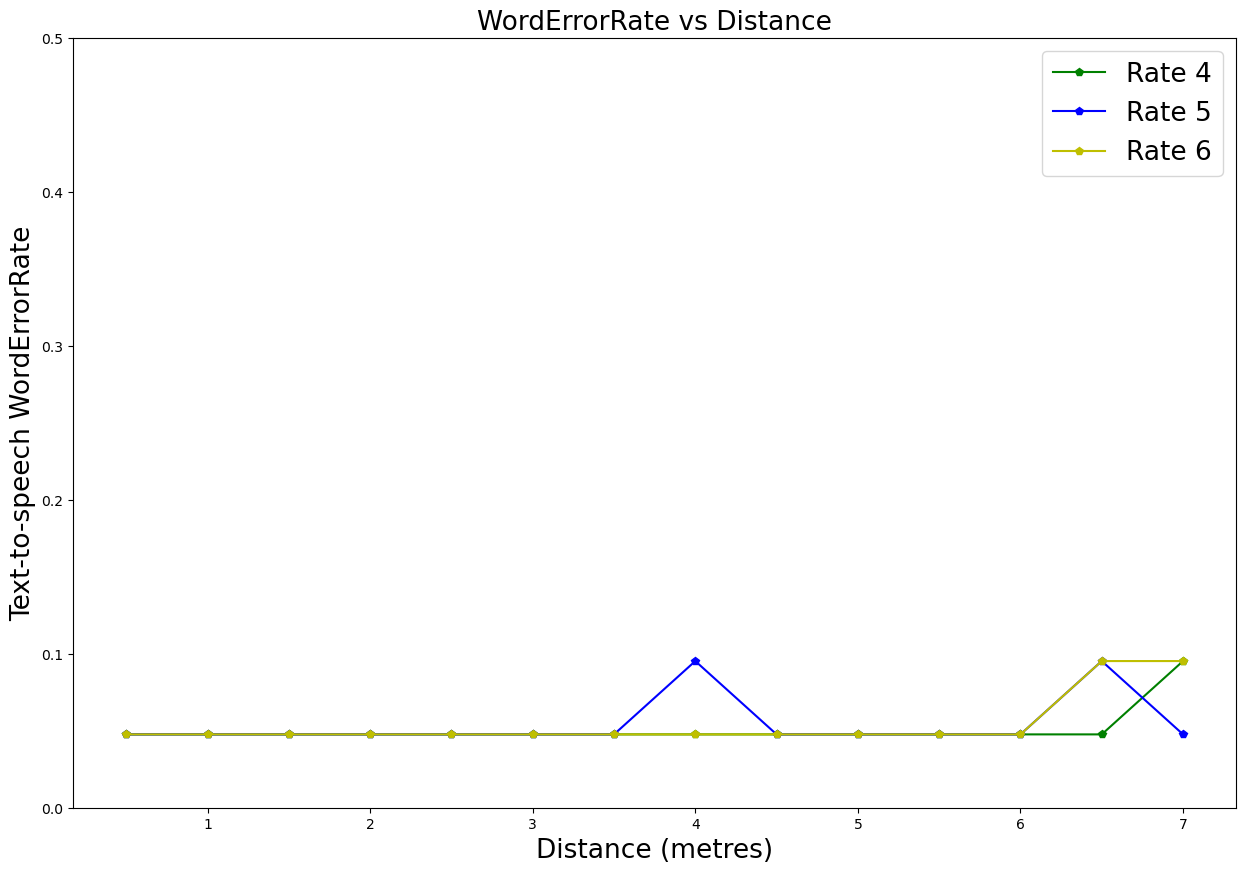

In [24]:

plt.figure(figsize=(15, 10))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 4')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 5')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 6')


plt.xlabel('Distance (metres)', fontsize=19)
plt.ylabel('Text-to-speech WordErrorRate', fontsize=19)
plt.title('WordErrorRate vs Distance', fontsize=19)
plt.ylim(0,0.5)
plt.legend(fontsize=19)
plt.show()